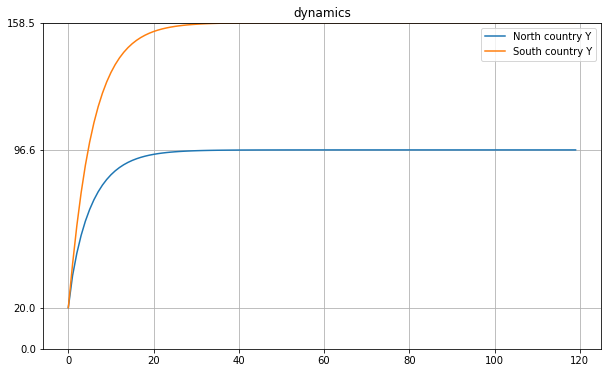

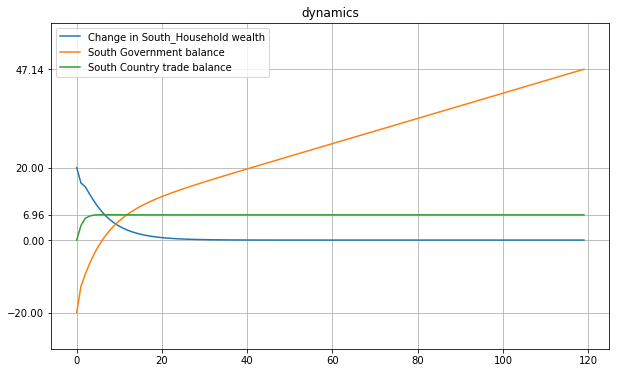

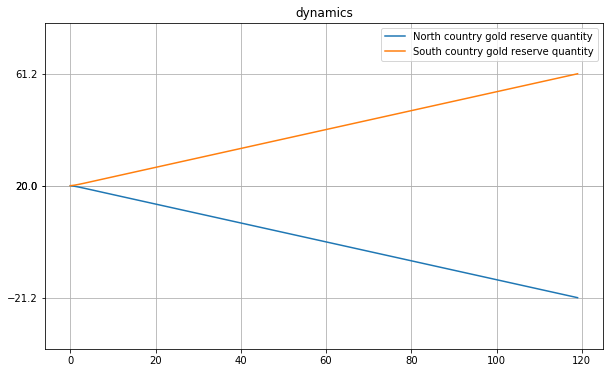

Enter the period to show the balance sheet and transaction matrix:2

Balance Sheet at period:  1
                    N. Household    N. Govt.    N. CentralBank    S. Household    S. Govt.    S. CentralBank    Sum
------------------  --------------  ----------  ----------------  --------------  ----------  ----------------  -------
Cash Money          14.76                       -14.76            18.64                       -18.64            0.00
Bills               16.12           -32.88      16.76             17.12           -31.76      14.64             0.00
Gold reserves                                   198.00                                        404.00            800.00
Balance(net worth)  -30.88          32.88       -200.00           -35.76          31.76       -400.00           -800.00
sum                 0.0             0.0         0.00              0.0             0.0         0.00              0.00

Transaction flow matrix at period:  1
----------------------  ---------  ---

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun  8 22:27:03 2017
Last modified on Thu Jun  8 22:27:03 2017

@author: Patrick X. Li

@email: xihao.li@gmail.com
"""


#### Model OPEN = two country economy ####
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6


"""
Methods used in the following codes
"""
Error_tolerance = 0.001;

def round_2(n1 ):
    if np.isscalar(n1):
        return np.round(  int( n1*1000 ) /1000, 2 );
    else:
        n2 = np.array(n1) * 1000;
        return np.round(  n2.astype(int) /1000, 2 );


def scalar_approximate_equal(n1, n2):
    if np.isscalar(n1) and np.isscalar(n2):
        if n2 != 0:
            return (abs(n1/n2 - 1) < Error_tolerance)
        elif n1 != 0:
            return (abs(n2/n1 - 1) < Error_tolerance)
        else:
            return True
    else:
        return False

"""
simulation parameter
"""
script_file_full_name = os.path.basename(sys.argv[0]);
script_file_name =  os.path.splitext(script_file_full_name)[0] + "_";
    
end_periods = 120
unit_test_activate = 0;
"""
Economic system variables
"""
North_theta = 0.2;
South_theta = 0.2;
North_r = 0.05;
South_r = 0.05;

xr = 2.0;
South_xr = xr;
North_xr = 1/xr;

North_goldPrice = 10.0;
North_goldQuantity = 20;
South_goldQuantity = 20;
North_initial_G = 20;
South_initial_G = 20;

alpha_1N = 0.6;
alpha_2N = 0.4;

lambda_0N = 0.635; # portion of expected net worth going to Household's treasury bill demand
lambda_1N = 5; # sensitive parameter of Household's treasury bill demand 
                 # on the rate of return on treasury bills
lambda_2N = 0.01; # sensitive parameter of Household's treasury bill demand 
                 # on the level of disposable income relative to Household's net worth
mu_N = 0.2; # parameter used to decide how much to import

 
alpha_1S = 0.7;
alpha_2S = 0.3;

lambda_0S = 0.67; # portion of expected net worth going to Household's treasury bill demand
lambda_1S = 6; # sensitive parameter of Household's treasury bill demand 
                # on the rate of return on treasury bills
lambda_2S = 0.07; # sensitive parameter of Household's treasury bill demand 
                # on the level of disposable income relative to Household's net worth
mu_S = 0.2; # parameter used to decide how much to import



                
class Household:
    def __init__(self):        
        """
        Stock variable in Balance Sheet
        """
        self.H = np.zeros(end_periods); # Household's money demand
        self.B = np.zeros(end_periods); # Household's treasury bill demand
        self.V = np.zeros(end_periods); # Household's net worth
        """
        Flow variables in Transactions-flow matrix
        """   
        self.C = np.zeros(end_periods); # Household's consumption demand
        self.Y = np.zeros(end_periods); # Household's income in aggregate demand side
        self.YD = np.zeros(end_periods); # Household's disposable income in aggregate demand side
        self.YD_e = np.zeros(end_periods); # Household's expectation on disposable income in aggregate demand side
        self.V_e = np.zeros(end_periods); # Household's expectation on Household's net worth
        self.T = np.zeros(end_periods); # Household's tax supply
        self.delta_H = np.zeros(end_periods); # change of Household's money demand
        self.delta_B = np.zeros(end_periods); # change of Household's treasury bill demand
        
class Production:
    def __init__(self):     
        """
        Flow variables in Transactions-flow matrix
        """       
        self.C = np.zeros(end_periods); # Production's consumption supply
        self.G = np.zeros(end_periods); # Production's Government spending supply
        self.IM = np.zeros(end_periods); # Production's import from other region
        self.X = np.zeros(end_periods); # Production's export to other region
        self.Y = np.zeros(end_periods); # Production's production in aggregate supply side
        self.Y_e = np.zeros(end_periods); # Production's expectation on production in aggregate supply side, used to decide how much to import

class Government:
    def __init__(self):
        """
        Stock variable in Balance Sheet
        """    
        self.B = np.zeros(end_periods); # Government's treasury total bill supply
        self.BCB = np.zeros(end_periods); # Government's treasury bill supply to CentralBank
        self.V = np.zeros(end_periods); # Government's net worth    
        """
        Flow variables in Transactions-flow matrix
        """   
        self.G = np.zeros(end_periods); # Government's spending demand
        self.IP = np.zeros(end_periods); # Government's interest payment for government bills
        self.CB_P = np.zeros(end_periods); # Government's receiving Central Bank's profit
        self.T = np.zeros(end_periods); # Government's tax demand
        self.delta_B = np.zeros(end_periods); # change of Government's treasury bill supply
        """
        Economic variables
        """
        self.r = np.zeros(end_periods); # Government's government bill interest rate
        self.theta = np.zeros(end_periods); # Government's tax rate
    

class CentralBank:
    def __init__(self):    
        """
        Stock variable in Balance Sheet
        """
        self.H = np.zeros(end_periods); # Central Bank's money supply
        self.B = np.zeros(end_periods); # Central Bank's treasury bill demand
        self.V = np.zeros(end_periods); # Central Bank's net worth
        self.goldReserve = np.zeros(end_periods); # Central Bank's gold reserve = gold amount * gold price
        self.goldQuantity = np.zeros(end_periods); # Central Bank's gold amount
        """
        Flow variables in Transactions-flow matrix
        """ 
        self.IP = np.zeros(end_periods); # Central Bank's interest payment
        self.P = np.zeros(end_periods); # Central Bank's profit
        self.delta_H = np.zeros(end_periods); # change of Central Bank's money supply
        self.delta_B = np.zeros(end_periods); # change of Central Bank's treasury bill demand
        """
        Economic variables
        """
        self.goldPrice = np.zeros(end_periods); # Central Bank's gold price, used for international trade                
        self.exchangeRate = np.zeros(end_periods); # Central Bank's exchange rate 
        
"""
Two countries with two types of Household, Production, Government, CentralBank
"""
North_Household = Household();
South_Household = Household();
North_Production = Production();
South_Production = Production();
North_Government = Government()
South_Government = Government()    
North_CentralBank = CentralBank()
South_CentralBank = CentralBank()

North_Government.r[0] = North_r;
South_Government.r[0] = South_r;
North_Government.theta[0] = North_theta;
South_Government.theta[0] = South_theta;
North_CentralBank.exchangeRate[0] = North_xr;
South_CentralBank.exchangeRate[0] = South_xr;
North_CentralBank.goldPrice[0] = North_goldPrice;
South_CentralBank.goldPrice[0] = North_CentralBank.goldPrice[0] * South_CentralBank.exchangeRate[0];
North_CentralBank.goldQuantity[0] = North_goldQuantity;
South_CentralBank.goldQuantity[0] = South_goldQuantity;
North_CentralBank.goldReserve[0] = North_CentralBank.goldPrice[0] * North_CentralBank.goldQuantity[0]
South_CentralBank.goldReserve[0] = South_CentralBank.goldPrice[0] * South_CentralBank.goldQuantity[0]
## For each Government, initialize the value of YD[0] ==#
## North_Government
North_Government.G[0] = North_initial_G;
## South_Government
South_Government.G[0] = South_initial_G;

## Production produces government spending
North_Production.G[0] = North_Government.G[0];
South_Production.G[0] = South_Government.G[0];

## Government issues treasury bills to supply government spending
# North_Government
North_Government.B[0] = North_Government.G[0]; # Government issue treasury bill to support its government spending
North_Government.delta_B[0] = North_Government.B[0] - 0.0; # Government admits its change of treasury bills 
# South Government
South_Government.B[0] = South_Government.G[0]; # Government issue treasury bill to support its government spending
South_Government.delta_B[0] = South_Government.B[0] - 0.0; # Government admits its change of treasury bills 


# Central Bank buys all the outstanding treasury bills issued by government
North_CentralBank.B[0] = North_Government.B[0] - North_Household.B[0]; # Central Bank buys all the outstanding treasury bills issued by government
North_CentralBank.delta_B[0] = North_CentralBank.B[0] - 0.0;
South_CentralBank.B[0] = South_Government.B[0] - South_Household.B[0]; # Central Bank buys all the outstanding treasury bills issued by government
South_CentralBank.delta_B[0] = South_CentralBank.B[0] - 0.0;

## Household realizes its income = production
North_Household.Y[0] = North_Government.G[0] + North_Household.C[0]; 
South_Household.Y[0] = South_Government.G[0] + South_Household.C[0]; 
## Household demands the increment of high-power money = its income
North_Household.delta_H[0] = North_Household.Y[0];
South_Household.delta_H[0] = South_Household.Y[0];
## Household realizes its high-power money stock after the increment of high-power money demand
North_Household.H[0] = 0.0 + North_Household.delta_H[0];
South_Household.H[0] = 0.0 + South_Household.delta_H[0];
## CentralBank supplies high-power money demand
North_CentralBank.H[0] = North_Household.H[0];
South_CentralBank.H[0] = South_Household.H[0];
North_CentralBank.delta_H[0] = North_Household.delta_H[0];
South_CentralBank.delta_H[0] = South_Household.delta_H[0];

## Household disposable income is equal to income - tax
North_Household.YD[0] = North_Household.Y[0] - North_Government.theta[0] * North_Household.Y[0];
South_Household.YD[0] = South_Household.Y[0] - South_Government.theta[0] * South_Household.Y[0];
## Production realizes its supply according to demand
North_Production.Y_e[0] = North_Production.C[0] + North_Production.G[0] + North_Production.X[0] - North_Production.IM[0];
North_Production.Y[0] = North_Production.Y_e[0];
South_Production.Y_e[0] = South_Production.C[0] + South_Production.G[0] + South_Production.X[0] - South_Production.IM[0];
South_Production.Y[0] = South_Production.Y_e[0];
## Household updates its net worth
North_Household.V[0] = North_Household.H[0] + North_Household.B[0];
South_Household.V[0] = South_Household.H[0] + South_Household.B[0];
## Government updates its net worth
North_Government.V[0] = North_Government.B[0];
South_Government.V[0] = South_Government.B[0];
## CentralBank updates its net worth
North_CentralBank.V[0] = - North_CentralBank.H[0] + North_CentralBank.B[0] + North_CentralBank.goldReserve[0];
South_CentralBank.V[0] = - South_CentralBank.H[0] + South_CentralBank.B[0] + South_CentralBank.goldReserve[0];


for t in range(1,end_periods):

    """
    Economy varialbe update
    """
    North_Government.r[t] = North_Government.r[t-1];
    South_Government.r[t] = South_Government.r[t-1];
    North_Government.theta[t] = North_Government.theta[t-1];
    South_Government.theta[t] = South_Government.theta[t-1];
    North_CentralBank.exchangeRate[t] = North_CentralBank.exchangeRate[t-1];
    South_CentralBank.exchangeRate[t] = South_CentralBank.exchangeRate[t-1];
    North_CentralBank.goldPrice[t] = North_CentralBank.goldPrice[t-1];
    South_CentralBank.goldPrice[t] = South_CentralBank.goldPrice[t-1];
    
    """
    Government decides its spending
    """
    North_Government.G[t] = North_Government.G[t-1];
    South_Government.G[t] = South_Government.G[t-1];  
        
    """
    Household makes expectation on disposable income: YD_e
    """
    North_Household.YD_e[t] = North_Household.YD[t-1]; # Household's expectation on its YD
    South_Household.YD_e[t] = South_Household.YD[t-1]; # Household's expectation on its YD
    """
    Based on expectation, Household decides demand for consumption
    """
    North_Household.C[t] = alpha_1N * North_Household.YD_e[t] + alpha_2N * North_Household.V[t-1]; # Household's consumption demand, based on its expectation on    
    South_Household.C[t] = alpha_1S * South_Household.YD_e[t] + alpha_2S * South_Household.V[t-1]; # Household's consumption demand, based on its expectation on    
    """
    Household makes expectation on net worth: V_e
    """    
    North_Household.V_e[t] = North_Household.V[t-1] + ( North_Household.YD_e[t] - North_Household.C[t] ); # expectational rule of Household's net worth 
    South_Household.V_e[t] = South_Household.V[t-1] + ( South_Household.YD_e[t] - South_Household.C[t] ); # expectational rule of Household's net worth 
    """
    Based on expectation, Household decides demand for treasury bill, 
    demand for money: B and H
    """
    North_Household.B[t] = lambda_0N * North_Household.V_e[t] + lambda_1N * North_Government.r[t] * North_Household.V_e[t] - lambda_2N * North_Household.YD_e[t];
    South_Household.B[t] = lambda_0S * South_Household.V_e[t] + lambda_1S * South_Government.r[t] * South_Household.V_e[t] - lambda_2S * South_Household.YD_e[t];
    
    North_Household.H[t] = North_Household.V_e[t] - North_Household.B[t];
    South_Household.H[t] = South_Household.V_e[t] - South_Household.B[t];
    """
    Production expects how much to import based on previous total production
    """
    North_Production.Y_e[t] = North_Production.Y[t-1];
    South_Production.Y_e[t] = South_Production.Y[t-1];
    """
    Production decides how much to import from other region
    """
    North_Production.IM[t] = mu_N * North_Production.Y_e[t];
    South_Production.IM[t] = mu_S * South_Production.Y_e[t];
    """
    Production realizes supply = demand
    """
    North_Production.G[t] = North_Government.G[t];
    South_Production.G[t] = South_Government.G[t];
    
    North_Production.C[t] = North_Household.C[t];
    South_Production.C[t] = South_Household.C[t];
    
    North_Production.X[t] = South_Production.IM[t] * North_CentralBank.exchangeRate[t];
    South_Production.X[t] = North_Production.IM[t] * South_CentralBank.exchangeRate[t];

    North_Production.Y[t] = North_Production.G[t] + North_Production.C[t] + North_Production.X[t] - North_Production.IM[t];
    South_Production.Y[t] = South_Production.G[t] + South_Production.C[t] + South_Production.X[t] - South_Production.IM[t];
    """
    Household realizes its production, tax payment                                       
    """
    North_Household.Y[t] = North_Production.Y[t];
    South_Household.Y[t] = South_Production.Y[t];
    
    North_Household.T[t] = North_Government.theta[t] * ( North_Household.Y[t] + North_Government.r[t-1] * North_Household.B[t-1] );
    South_Household.T[t] = South_Government.theta[t] * ( South_Household.Y[t] + South_Government.r[t-1] * South_Household.B[t-1] );
    """
    Government collects tax
    """
    North_Government.T[t] = North_Household.T[t];
    South_Government.T[t] = South_Household.T[t];
    """
    Household realizes its disposable income and net worth                                 
    """
    North_Household.YD[t] = North_Household.Y[t] - North_Household.T[t] + North_Government.r[t-1] * North_Household.B[t-1];
    South_Household.YD[t] = South_Household.Y[t] - South_Household.T[t] + South_Government.r[t-1] * South_Household.B[t-1];
    North_Household.V[t] = North_Household.V[t-1] + ( North_Household.YD[t] - North_Household.C[t] );
    South_Household.V[t] = South_Household.V[t-1] + ( South_Household.YD[t] - South_Household.C[t] );
    """
    Household adjusts, at the end of period, any discrepency 
    between realized net worth and treasury bill demand, 
    putting it as money demand 
    """
    North_Household.H[t] = North_Household.V[t] - North_Household.B[t]; 
    South_Household.H[t] = South_Household.V[t] - South_Household.B[t]; 
    
    North_Household.delta_H[t] = North_Household.H[t] - North_Household.H[t-1];
    South_Household.delta_H[t] = South_Household.H[t] - South_Household.H[t-1];    
    """
    Government decides its new level of treasury bill    
    """
    North_CentralBank.P[t] = North_Government.r[t-1] * North_CentralBank.B[t-1];
    North_Government.CB_P[t] = North_CentralBank.P[t];    
    North_Government.delta_B[t] = (North_Government.G[t] + North_Government.r[t-1] * North_Government.B[t-1]) - (North_Government.T[t] + North_Government.CB_P[t]);
    North_Government.B[t] = North_Government.B[t-1] + North_Government.delta_B[t];
    North_Government.V[t] = North_Government.B[t];    

    South_CentralBank.P[t] = South_Government.r[t-1] * South_CentralBank.B[t-1];
    South_Government.CB_P[t] = South_CentralBank.P[t];    
    South_Government.delta_B[t] = (South_Government.G[t] + South_Government.r[t-1] * South_Government.B[t-1]) - (South_Government.T[t] + South_Government.CB_P[t]);
    South_Government.B[t] = South_Government.B[t-1] + South_Government.delta_B[t];
    South_Government.V[t] = South_Government.B[t];   
    """
    Government computes its interest payment for treasury bills, only for data recording
    """
    North_Government.IP[t] = North_Government.r[t-1] * North_Government.B[t-1];
    South_Government.IP[t] = South_Government.r[t-1] * South_Government.B[t-1];
    """
    CentralBank collects the residual of treasury bill in the market:
    the difference between Government's bill supply and 2 region Household's bill demand
    """
    North_CentralBank.B[t] = North_Government.B[t] - North_Household.B[t];
    South_CentralBank.B[t] = South_Government.B[t] - South_Household.B[t];
    
    """
    CentraBank decides its new level of money supply based on its change of treasury bill bought in
    """    
    North_CentralBank.delta_B[t] = North_CentralBank.B[t] - North_CentralBank.B[t-1];
    South_CentralBank.delta_B[t] = South_CentralBank.B[t] - South_CentralBank.B[t-1];
    North_CentralBank.H[t] = North_Household.H[t];
    North_CentralBank.delta_H[t] = North_CentralBank.H[t] - North_CentralBank.H[t-1];    
    North_CentralBank.goldQuantity[t] = North_CentralBank.goldQuantity[t-1] + 1/North_CentralBank.goldPrice[t] * ( North_CentralBank.delta_H[t] - North_CentralBank.delta_B[t] );
    
    South_CentralBank.H[t] = South_Household.H[t];
    South_CentralBank.delta_H[t] = South_CentralBank.H[t] - South_CentralBank.H[t-1];    
    South_CentralBank.goldQuantity[t] = South_CentralBank.goldQuantity[t-1] + 1/South_CentralBank.goldPrice[t] * ( South_CentralBank.delta_H[t] - South_CentralBank.delta_B[t] );
    
    """
    Household computes its change of treasury bill, to check stock-flow consistency 
    """
    North_Household.delta_B[t] = North_Household.B[t] - North_Household.B[t-1];
    South_Household.delta_B[t] = South_Household.B[t] - South_Household.B[t-1];
    
    """
    CentralBank update gold reserve
    """
    North_CentralBank.goldReserve[t] = North_CentralBank.goldPrice[t] * North_CentralBank.goldQuantity[t]
    South_CentralBank.goldReserve[t] = South_CentralBank.goldPrice[t] * South_CentralBank.goldQuantity[t]
    """
    CentralBank update net worth
    """
    North_CentralBank.V[t] = - North_CentralBank.H[t] + North_CentralBank.B[t] + North_CentralBank.goldReserve[t]
    South_CentralBank.V[t] = - South_CentralBank.H[t] + South_CentralBank.B[t] + South_CentralBank.goldReserve[t]
    # unit test on stock-flow consistency
    if unit_test_activate == 1:
        if scalar_approximate_equal( -(North_CentralBank.goldQuantity[t] - North_CentralBank.goldQuantity[t-1]) , South_CentralBank.goldQuantity[t] - South_CentralBank.goldQuantity[t-1] ):
            print('Consistency check: - change of gold amount at North == change of gold amount at South');
        else:
            print('Warning! - change of gold amount at North == change of gold amount at South INconsistency!'); 

# plot 2 countries Household expectation on disposable income, realized disposable income, 
# and total income == GDP in demand side

plot_period = end_periods + 1;
plt.figure()
plt.plot(North_Household.Y, label = 'North country Y')
plt.plot(South_Household.Y, label = 'South country Y')
plt.title('dynamics')
plt.legend(['North country Y', 'South country Y'], loc=0) # legend automatically in the best location
plt.ylim(0, 110)
extraticks=[0, np.min(North_Household.Y), North_Household.Y[end_periods-1], South_Household.Y[end_periods-1] ]
plt.yticks(list(plt.yticks()[0]) + extraticks)
plt.yticks(extraticks)
plt.grid()
plt.savefig(script_file_name + 'fig_01.jpg') 
plt.show()

South_Household_delta_V = np.diff( np.insert(South_Household.V ,0, 0.0 ) )

plt.figure()
plt.plot(South_Household_delta_V, label = 'Change in South_Household wealth')
plt.plot(-(South_Government.G + South_Government.IP - South_Government.T), label = 'Government balance with the South country')
plt.plot(South_Production.X - South_Production.IM, label = 'Trade balance of the South country')
plt.title('dynamics')
plt.legend(['Change in South_Household wealth', 'South Government balance', 'South Country trade balance'], loc=0) # legend automatically in the best location
extraticks=[np.max(South_Household_delta_V), South_Household_delta_V[end_periods-1], np.min(-(South_Government.G + South_Government.IP - South_Household.T)), -( South_Government.G[end_periods-1] + South_Government.IP[end_periods-1] - South_Household.T[end_periods-1] ), South_Production.X[end_periods-1] - South_Production.IM[end_periods-1] ]
plt.yticks(list(plt.yticks()[0]) + extraticks)
plt.yticks(extraticks)
plt.grid()
plt.savefig(script_file_name + 'fig_02.jpg') 
plt.show()


plt.figure()
plt.plot(North_CentralBank.goldQuantity, label = 'North country gold reserve quantity')
plt.plot(South_CentralBank.goldQuantity, label = 'South country gold reserve quantity')
plt.title('dynamics')
plt.legend(['North country gold reserve quantity', 'South country gold reserve quantity'], loc=0) # legend automatically in the best location
extraticks=[np.max(North_CentralBank.goldQuantity), North_CentralBank.goldQuantity[end_periods-1], np.min(South_CentralBank.goldQuantity), South_CentralBank.goldQuantity[end_periods-1] ]
plt.yticks(list(plt.yticks()[0]) + extraticks)
plt.yticks(extraticks)
plt.grid()
plt.savefig(script_file_name + 'fig_03.jpg') 
plt.show()

while True:
    table_periods = int(input('Enter the period to show the balance sheet and transaction matrix:'))
    if table_periods > end_periods + 1:
        table_periods = end_periods;
     
    BS_headers = [" ", "N. Household", "N. Govt.", "N. CentralBank", "S. Household", "S. Govt.", "S. CentralBank", "Sum"]
    # balance sheet table
    sum_cashMoney =  round_2( sum( [round_2(North_Household.H[table_periods-1]) , round_2(-North_CentralBank.H[table_periods-1]), round_2(South_Household.H[table_periods-1]), round_2(-South_CentralBank.H[table_periods-1])] ) )
    
    sum_Bills = round_2(sum([ round_2(North_Household.B[table_periods-1]), round_2(- North_Government.B[table_periods-1]), round_2(North_CentralBank.B[table_periods-1] ), round_2(South_Household.B[table_periods-1]), round_2(- South_Government.B[table_periods-1]), round_2(South_CentralBank.B[table_periods-1] ) ]) )
    
    sum_goldReserves = round_2( sum([  round_2(+ North_CentralBank.goldReserve[table_periods-1] * South_CentralBank.exchangeRate[table_periods-1] ), round_2(South_CentralBank.goldReserve[table_periods-1]) ]) )
    
    sum_Balance = round_2( sum([ round_2(- North_Household.V[table_periods-1]), round_2(North_Government.V[table_periods-1] ), round_2(- North_CentralBank.V[table_periods-1] ) ]) * South_CentralBank.exchangeRate[table_periods-1] + sum([ round_2( - South_Household.V[table_periods-1]), round_2( South_Government.V[table_periods-1] ), round_2( -South_CentralBank.V[table_periods-1] ) ]) )
    
    sum_col_N_Household = round_2( sum( [ round_2(North_Household.H[table_periods-1]), round_2(North_Household.B[table_periods-1]), round_2(- North_Household.V[table_periods-1]) ] ) )
    
    sum_col_N_Government = round_2( sum([ round_2(- North_Government.B[table_periods-1]), round_2(North_Government.V[table_periods-1] ) ]) )
    
    sum_col_N_CentralBank = round_2( sum([ round_2(-North_CentralBank.H[table_periods-1]), round_2(North_CentralBank.B[table_periods-1] ), round_2(+ North_CentralBank.goldReserve[table_periods-1] ), round_2(- North_CentralBank.V[table_periods-1] ) ]) )
    sum_col_S_Household = round_2( sum( [ round_2(South_Household.H[table_periods-1]), round_2(South_Household.B[table_periods-1]), round_2(- South_Household.V[table_periods-1]) ] ) )
    
    sum_col_S_Government = round_2( sum([ round_2(- South_Government.B[table_periods-1]), round_2(South_Government.V[table_periods-1] ) ]) )
    
    sum_col_S_CentralBank = round_2( sum([ round_2(-South_CentralBank.H[table_periods-1]), round_2(South_CentralBank.B[table_periods-1] ), round_2(+ South_CentralBank.goldReserve[table_periods-1] ), round_2(- South_CentralBank.V[table_periods-1] ) ]) )
    sum_all_cols = round_2( sum(round_2([ sum_col_N_Household, sum_col_N_Government, sum_col_N_CentralBank * South_CentralBank.exchangeRate[table_periods-1], sum_col_S_Household, sum_col_S_Government, sum_col_S_CentralBank ])) )
    
    bs_table = [["Cash Money", round_2(North_Household.H[table_periods-1]) , " " , round_2(-North_CentralBank.H[table_periods-1]), round_2(South_Household.H[table_periods-1]), " " , round_2(-South_CentralBank.H[table_periods-1]), sum_cashMoney ], 
                ["Bills", round_2(North_Household.B[table_periods-1]), round_2(- North_Government.B[table_periods-1]), round_2(North_CentralBank.B[table_periods-1] ), round_2(South_Household.B[table_periods-1]), round_2(- South_Government.B[table_periods-1]), round_2(South_CentralBank.B[table_periods-1] ),  sum_Bills  ],
                ["Gold reserves" , " "  , " "  , round_2(+ North_CentralBank.goldReserve[table_periods-1] ), " " , " " , round_2(South_CentralBank.goldReserve[table_periods-1]), sum_goldReserves ],
                ["Balance(net worth)", round_2(- North_Household.V[table_periods-1]), round_2( North_Government.V[table_periods-1] ), round_2(- North_CentralBank.V[table_periods-1] ), round_2( - South_Household.V[table_periods-1]), round_2( South_Government.V[table_periods-1] ), round_2(- South_CentralBank.V[table_periods-1] ) , sum_Balance  ],
                ["sum", sum_col_N_Household, sum_col_N_Government, sum_col_N_CentralBank, sum_col_S_Household, sum_col_S_Government, sum_col_S_CentralBank, sum_all_cols   ]
                ]
    print("\nBalance Sheet at period: ", table_periods-1)
    print(tabulate(bs_table, BS_headers, floatfmt=".2f", numalign="left") )
    
    
    # transaction flow table
    sum_row_Consumption = round_2( sum([ round_2(-North_Household.C[table_periods-1]),  round_2(+North_Production.C[table_periods-1]), round_2(-South_Household.C[table_periods-1]),  round_2(+South_Production.C[table_periods-1]) ]) )
    
    sum_row_Govt_exp = round_2( sum([ round_2( +North_Production.G[table_periods-1] ), round_2(- North_Government.G[table_periods-1]) ,  round_2( +South_Production.G[table_periods-1] ), round_2( - ( South_Government.G[table_periods-1] ) ) ]) )
    
    sum_row_North_export = round_2( sum([ round_2( +North_Production.X[table_periods-1] ) * South_CentralBank.exchangeRate[table_periods-1], round_2( -South_Production.IM[table_periods-1] ) ]) )
    
    sum_row_South_export = round_2( sum([ round_2( -North_Production.IM[table_periods-1] )  * South_CentralBank.exchangeRate[table_periods-1], round_2( +South_Production.X[table_periods-1] ) ]) )
    
    sum_row_GDP = round_2( sum([ round_2(North_Household.Y[table_periods-1] ), round_2( -North_Production.Y[table_periods-1] ), round_2(South_Household.Y[table_periods-1] ), round_2( -South_Production.Y[table_periods-1] ) ]) )
    
    sum_row_Interest_payments = round_2( sum([ round_2( + North_Government.r[table_periods-1-1] * North_Household.B[table_periods-1-1] ), round_2( - North_Government.r[table_periods-1-1] * North_Government.B[table_periods-1-1]), round_2( North_Government.r[table_periods-1-1] * North_CentralBank.B[table_periods-1-1] ) , round_2( + South_Government.r[table_periods-1-1] * South_Household.B[table_periods-1-1] ), round_2( - South_Government.r[table_periods-1-1] * South_Government.B[table_periods-1-1]), round_2( South_Government.r[table_periods-1-1] * South_CentralBank.B[table_periods-1-1] )  ]) )
    
    sum_row_Central_bank_profits = round_2( sum([ round_2( + North_Government.CB_P[table_periods -1] ), round_2( -North_CentralBank.P[table_periods-1] ), round_2( + South_Government.CB_P[table_periods -1] ), round_2( -South_CentralBank.P[table_periods-1] ) ]) )
    
    sum_row_Taxes = round_2( sum([ round_2( -North_Household.T[table_periods-1] ), round_2(North_Government.T[table_periods-1]),  round_2( -South_Household.T[table_periods-1] ), round_2(South_Government.T[table_periods-1]) ]) )
    
    sum_row_Change_in_cash = round_2( sum([ round_2( -North_Household.delta_H[table_periods-1] ), round_2( North_CentralBank.delta_H[table_periods-1] ),  round_2( -South_Household.delta_H[table_periods-1] ), round_2( South_CentralBank.delta_H[table_periods-1] ) ]) )
    
    sum_row_Change_in_bills = round_2( sum([ round_2( -North_Household.delta_B[table_periods-1] ), round_2( North_Government.delta_B[table_periods-1]) , round_2(- North_CentralBank.delta_B[table_periods-1]) , round_2( -South_Household.delta_B[table_periods-1] ), round_2( South_Government.delta_B[table_periods-1]) , round_2(- South_CentralBank.delta_B[table_periods-1])  ]) )
    
    sum_row_change_gold_reserve = round_2( sum([ round_2( -North_CentralBank.goldPrice[table_periods-1] * ( North_CentralBank.goldQuantity[table_periods-1] - North_CentralBank.goldQuantity[table_periods-1-1] ) * South_CentralBank.exchangeRate[table_periods-1] ), round_2( -South_CentralBank.goldPrice[table_periods-1] * ( South_CentralBank.goldQuantity[table_periods-1] - South_CentralBank.goldQuantity[table_periods-1-1] ) ) ]) )
    
    sum_column_N_Household = round_2( sum([ round_2(-North_Household.C[table_periods-1]), round_2(North_Household.Y[table_periods-1] ), round_2( + North_Government.r[table_periods-1-1] * North_Household.B[table_periods-1-1] ), round_2( -North_Household.T[table_periods-1] ),round_2( -North_Household.delta_H[table_periods-1] ), round_2( -North_Household.delta_B[table_periods-1] )  ]) )
    
    sum_column_N_Production = round_2( sum([ round_2(+North_Production.C[table_periods-1]), round_2( +North_Production.G[table_periods-1]), round_2( +North_Production.X[table_periods-1] ), round_2( -North_Production.IM[table_periods-1] ), round_2( -North_Production.Y[table_periods-1] ) ]) )
    
    sum_column_N_Govt = round_2( sum([ round_2(- North_Government.G[table_periods-1]), round_2( - North_Government.r[table_periods-1-1] * North_Government.B[table_periods-1-1]), round_2( + North_Government.CB_P[table_periods -1] ), round_2(North_Government.T[table_periods-1]), round_2( North_Government.delta_B[table_periods-1])  ]) )
    
    sum_column_N_CentralBank = round_2( sum([ round_2( North_Government.r[table_periods-1-1] * North_CentralBank.B[table_periods-1-1] ), round_2( -North_CentralBank.P[table_periods-1] ), round_2( North_CentralBank.delta_H[table_periods-1] ), round_2(- North_CentralBank.delta_B[table_periods-1]), round_2( -North_CentralBank.goldPrice[table_periods-1] * ( North_CentralBank.goldQuantity[table_periods-1] - North_CentralBank.goldQuantity[table_periods-1-1] ) ) ]) )
    
    sum_column_S_Household = round_2( sum([ round_2(-South_Household.C[table_periods-1]), round_2(South_Household.Y[table_periods-1] ), round_2( + South_Government.r[table_periods-1-1] * South_Household.B[table_periods-1-1] ), round_2( -South_Household.T[table_periods-1] ),round_2( -South_Household.delta_H[table_periods-1] ), round_2( -South_Household.delta_B[table_periods-1] )  ]) )
    
    sum_column_S_Production = round_2( sum([ round_2(+South_Production.C[table_periods-1]), round_2(+ South_Production.G[table_periods-1]), round_2( +South_Production.X[table_periods-1] ), round_2( -South_Production.IM[table_periods-1] ), round_2( -South_Production.Y[table_periods-1] ) ]) )
    
    sum_column_S_Govt = round_2( sum([ round_2(- South_Government.G[table_periods-1]), round_2( - South_Government.r[table_periods-1-1] * South_Government.B[table_periods-1-1]), round_2( + South_Government.CB_P[table_periods -1] ), round_2(South_Government.T[table_periods-1]), round_2( South_Government.delta_B[table_periods-1])  ]) )
    
    sum_column_S_CentralBank = round_2( sum([ round_2( South_Government.r[table_periods-1-1] * South_CentralBank.B[table_periods-1-1] ), round_2( -South_CentralBank.P[table_periods-1] ), round_2( South_CentralBank.delta_H[table_periods-1] ), round_2(- South_CentralBank.delta_B[table_periods-1]), round_2( -South_CentralBank.goldPrice[table_periods-1] * ( South_CentralBank.goldQuantity[table_periods-1] - South_CentralBank.goldQuantity[table_periods-1-1] ) ) ]) )
    
    sum_all_columns = sum([ sum_column_N_Household, sum_column_N_Production, sum_column_N_Govt, sum_column_N_CentralBank, sum_column_S_Household, sum_column_S_Production, sum_column_S_Govt, sum_column_S_CentralBank ])
    
    tf_table = [[" ", "North",  "North", "North", "North",  "South",  "South", "South",  "South", " "],
                [" ", "Household", "Production","Govt." , "CentralBank" , "Household", "Production", "Govt." , "CentralBank" ,  "Sum"],
                [ "__________________", "_________", "_________",  "_________", "_________",  "_________", "_________",  "_________", "_________",  "_____"],
                ["Consumption", round_2(-North_Household.C[table_periods-1]),  round_2(+North_Production.C[table_periods-1]), " ", " ", round_2(-South_Household.C[table_periods-1]),  round_2(+South_Production.C[table_periods-1]), " ", " ",  sum_row_Consumption ],
    ["Govt. exp.", " " , round_2( +North_Production.G[table_periods-1] ), round_2(- North_Government.G[table_periods-1]) , " ", round_2( +South_Production.G[table_periods-1] ), round_2( - South_Government.G[table_periods-1] ), " ",  sum_row_Govt_exp ],
    ["North Exports to South", " ", round_2( +North_Production.X[table_periods-1] ), " ",  " ",  " ", round_2( -South_Production.IM[table_periods-1] ), " ", " ", sum_row_North_export ],
    ["South Exports to North", " ", round_2( -North_Production.IM[table_periods-1] ), " ", " ", " ", round_2( +South_Production.X[table_periods-1] ), " ", " ", sum_row_South_export ],
    ["GDP", round_2(North_Household.Y[table_periods-1] ), round_2( -North_Production.Y[table_periods-1] ), " ", " ",  round_2(South_Household.Y[table_periods-1] ), round_2( -South_Production.Y[table_periods-1] ), " ", " ",  sum_row_GDP  ],
    ["Interest payments", round_2( + North_Government.r[table_periods-1-1] * North_Household.B[table_periods-1-1] ), " ", round_2( - North_Government.r[table_periods-1-1] * North_Government.B[table_periods-1-1]), round_2( North_Government.r[table_periods-1-1] * North_CentralBank.B[table_periods-1-1] ) , round_2( + South_Government.r[table_periods-1-1] * South_Household.B[table_periods-1-1] ), " ", round_2( - South_Government.r[table_periods-1-1] * South_Government.B[table_periods-1-1]), round_2( South_Government.r[table_periods-1-1] * South_CentralBank.B[table_periods-1-1] )  , sum_row_Interest_payments ],
    ["Central bank profits", " ", " ", round_2( + North_Government.CB_P[table_periods -1] ), round_2( -North_CentralBank.P[table_periods-1] ), " ", " ", round_2( + South_Government.CB_P[table_periods -1] ), round_2( -South_CentralBank.P[table_periods-1] ),  sum_row_Central_bank_profits ],
    ["Taxes", round_2( -North_Household.T[table_periods-1] ), " ", round_2(North_Government.T[table_periods-1]), " ",  round_2( -South_Household.T[table_periods-1] ), " ", round_2(South_Government.T[table_periods-1]), " ",  sum_row_Taxes ],
    ["Change in cash", round_2( -North_Household.delta_H[table_periods-1] ), " ",  " ", round_2( North_CentralBank.delta_H[table_periods-1] ),  round_2( -South_Household.delta_H[table_periods-1] ), " ",  " ", round_2( South_CentralBank.delta_H[table_periods-1] ),  sum_row_Change_in_cash ],
    ["Change in bills", round_2( -North_Household.delta_B[table_periods-1] ), " ", round_2( North_Government.delta_B[table_periods-1]) , round_2(- North_CentralBank.delta_B[table_periods-1]) , round_2( -South_Household.delta_B[table_periods-1] ), " ", round_2( South_Government.delta_B[table_periods-1]) , round_2(- South_CentralBank.delta_B[table_periods-1]) , sum_row_Change_in_bills ],
    ["Change in reserves", " ", " ", " ", round_2( -North_CentralBank.goldPrice[table_periods-1] * ( North_CentralBank.goldQuantity[table_periods-1] - North_CentralBank.goldQuantity[table_periods-1-1] ) ), " ", " ", " ", round_2( -South_CentralBank.goldPrice[table_periods-1] * ( South_CentralBank.goldQuantity[table_periods-1] - South_CentralBank.goldQuantity[table_periods-1-1] ) ), sum_row_change_gold_reserve  ],
    [ "__________________", "_________", "_________", "_________", "_________", "_________", "_____", "_____" ],
    ["sum",sum_column_N_Household, sum_column_N_Production, sum_column_N_Govt, sum_column_N_CentralBank, sum_column_S_Household, sum_column_S_Production, sum_column_S_Govt, sum_column_S_CentralBank,  sum_all_columns ] 
    ]
    print("\nTransaction flow matrix at period: ", table_periods-1)
    print(tabulate(tf_table, floatfmt=".2f", numalign="left"))
    answer = input('Do you want to continue?:')
    if answer.lower().startswith("n"):
      print("ok, bye!")
      break
  